In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import init_printing 
from sympy import Matrix
init_printing(use_latex=True)
def out(mat, n=2): return Matrix(np.round(mat, decimals=n))
from IPython.core.display import HTML
HTML('<link href="https://fonts.googleapis.com/css?family=Cabin|Quicksand" rel="stylesheet"><style>.container{width:90% !important; font-family: "Cabin", sans-serif;}em{color: red !important;}</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

# Principal component analysis (PCA)

# Principal component analysis (PCA)

- PCA is an orthogonal transformation (rotation) to map correlated observations into a set of values of linearly uncorrelated variables (*principal components*)
  - we want to find the basis in which the data has a covariance matrix that is close to being diagonal 
  - we want to diagonalise the covariance matrix
- It turns out that the first principal component has the largest possible variance
  - it accounts for as much of the variability in the data as possible
- each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components


# Principal component analysis (PCA)

<center><img src="img/pca.gif" alt="z" width="1000"/></center>

# PCA steps

1. center dataset
2. find linear transformation that diagonalises covariance matrix
3. transform dataset (resulting dataset with decorrelated features, rotation of original dataset)
4. dimensionality reduction of the resulting dataset considers only the first few components  

# PCA (centered dataset)

- consider a $n \times p$ data matrix $X$ 
  - with column-wise zero empirical mean (**centered**)
  - where each of the $n$ rows represents a different repetition of the experiment
  - and each of the $p$ columns gives a particular kind of feature

# PCA (find linear transformation)

- we want a transformation which diagonalises the empirical sample covariance matrix
- the empirical covariance matrix (after centering) is proportional to $X^TX$ <br>(times a constant factor $1/(n-1)$ )
- **method 1**: to diagonalise $X^TX$ (a square matrix) we could compute the eigendecomposition of this matrix $V \Lambda V^T$ where $V$ is the change of basis matrix whose columns are the eigenvectors and $\Lambda$ a diagonal matrix (as the covariance matrix is symmetric, $V$ is orthogonal and it corresponds to a rotation of the axes)


# PCA (find linear transformation)

- **method 2**: we could compute the SVD of the (rectangular) data matrix $X=U \Sigma V^T$
- then the matrix $X^TX$ can be written as $V \Sigma^2 V^T$
- Comparison with the eigenvector factorization of $X^TX$ establishes that 
  - the right singular vectors $V$ of $X$ are equivalent to the eigenvectors of $X^T X$
  - the singular values $σ_k$ of $\Sigma$ (diagonal) are equal to the square root of the eigenvalues $λ_k$ of $X^T X$

# Observations

- note that there exist efficient algorithms to calculate the SVD of $X$ without having to form the matrix $X^T X$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix
- mean subtraction (a.k.a. "mean centering") is necessary for performing PCA to ensure that the first principal component describes the direction of maximum variance
- if mean subtraction is not performed, the first principal component might instead correspond more or less to a vector centered in the origin that points to the mean of the data


# Transform dataset
- $V^{-1}$ is the change of basis from the original natural basis to the basis formed by the column vectors of $V$
- in fact, since V is orthogonal: $V^{-1} = V^T$
- to transform a single observation: $t=V^{T}x$ (t and x are column vecors)
- for the entire dataset (observatons are rows): the transformation $T = X V$ maps each vector $x$ in the original dataset $X$ 
  - from an original space of $p$ variables 
  - to a new space of $p$ variables which are uncorrelated over the transformed dataset $T$
- Why $T = X V$? $T=(V^T X^T)^T=X V$ 

# Dimensionality reduction

- keeping only the first $L$ principal components (columns of $V$) gives the truncated linear transformation:  
  - $t=V_L^{T}x$
  - where $x\in \mathbb {R}^{p}$ 
  - and $t\in \mathbb {R}^{L}$
- where the columns of the $n × L$ matrix $V_L$ form an orthogonal basis for the $L$ features that are decorrelated ($x$ and $t$ column vectors) 



# Dimensionality reduction

- for the entire dataset, keeping only the first $L$ principal components (columns of $V$) gives the truncated transformation
$$T_L = X V_L$$
- where the matrix $T_L$ now has $n$ rows but only $L$ columns

- it turns out that, of all matrices $V_L$ with only L columns,
  - this matrix preserves maximally the variance in the original data, 
  - while minimising the total squared reconstruction error 
$$\| X  - X_{L}\|_F = \|T V^T - T_L  V_{L}^{T}\|_F = \|T V^T - X V_L  V_{L}^{T}\|_F $$


In [3]:
import pandas as pd

# get data matrix
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
D = df[df['age']>18][['height','weight']].values

# center data matrix
Dn = np.mat(D - np.mean(D, axis=0))

# svd of data matrix
U,s,Vt = np.linalg.svd(Dn)
V = Vt.T

# transformed data matrix 
Dpca = Dn*V


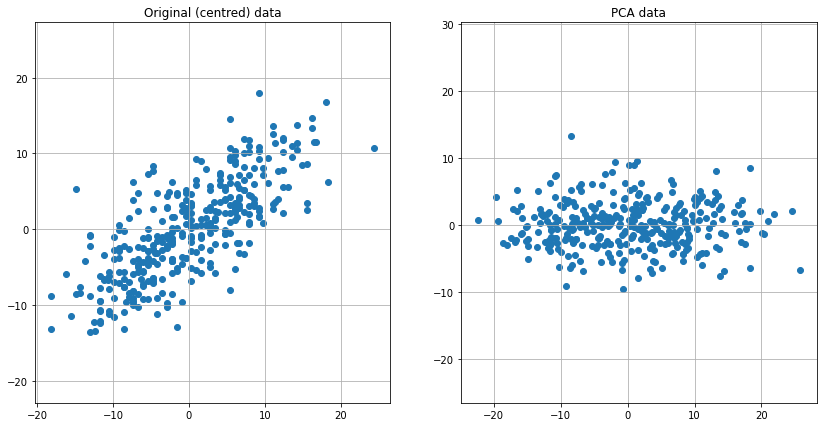

In [4]:
plt.subplots(1,2, figsize=(7*2,7))
plt.subplot(1,2,1)
x1,x2 = Dn.A.T
plt.scatter(x1,x2) 
plt.axis('equal')
plt.grid()
plt.title('Original (centred) data')
plt.subplot(1,2,2)
x1,x2 = Dpca.A.T 
plt.scatter(x1,-x2)
plt.axis('equal')
plt.title('PCA data')
plt.grid()
plt.show()